## TSTR(Train on synthetic, test on real)

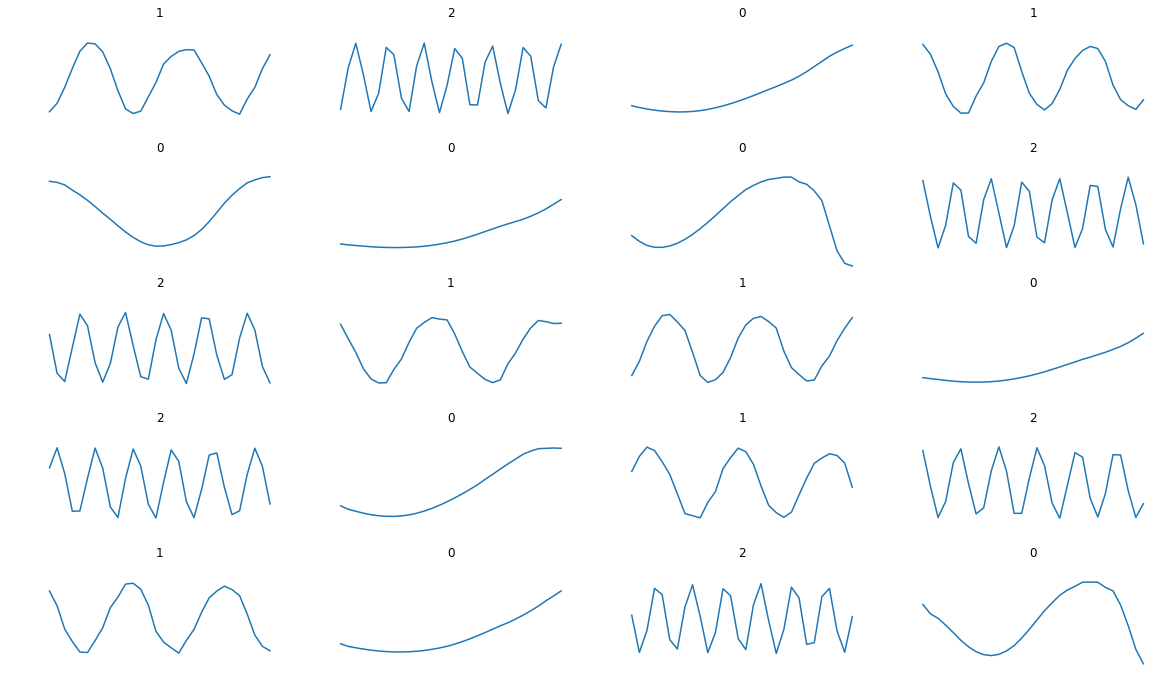

In [33]:
# test_generator = Generator()
cond = np.random.randint(0, labels, sample_size)
gen_sin_sample = generate_sin(rcgan.generator, cond)

plt.figure(figsize=(20, 12))
for i in range(sample_size):
    plt.subplot(5, 4, i + 1)
    plt.plot(gen_sin_sample[i])
    plt.ylim(-0.8, 0.8)
    plt.title(cond[i])
    plt.axis('off')

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [24]:
# load synthetic data for training
npz = np.load('synthetic_data.npz')
X_train, y_train = npz['x'], npz['y']
print(X_train.shape)
print(y_train.shape)
# load real data for testing
npz = np.load('true_data.npz')
X_eval, y_eval = npz['x'], npz['y']
print(X_eval.shape)
print(y_eval.shape)
# hyper parameter for training
input_dim = X_train.shape[2]
sequence = X_train.shape[1]
labels = 3
hidden_dim = 128
# to one-hot vector
y_train = np_utils.to_categorical(y_train, labels)
y_eval = np_utils.to_categorical(y_eval, labels)

(10000, 30, 1)
(10000,)
(1000, 30, 1)
(1000,)


In [6]:
model = Sequential()
model.add(LSTM(units=hidden_dim,
               batch_input_shape=(None, sequence, input_dim),
               return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(labels, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop",
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=0, verbose=1)

In [25]:
fit = model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          validation_data=[X_eval, y_eval],
          callbacks=[early_stopping])

Train on 10000 samples, validate on 1000 samples
Epoch 1/20
10000/10000 [==============================] - 5s 457us/step - loss: 0.1349 - acc: 0.9515 - val_loss: 0.1118 - val_acc: 0.9630
Epoch 2/20
10000/10000 [==============================] - 5s 452us/step - loss: 0.0271 - acc: 0.9969 - val_loss: 0.0367 - val_acc: 0.9790
Epoch 3/20
10000/10000 [==============================] - 5s 461us/step - loss: 0.0031 - acc: 0.9993 - val_loss: 0.1793 - val_acc: 0.9500
Epoch 00003: early stopping


In [26]:
# 学習が十分でないGANで作成した人工データ
npz = np.load('synthetic_data_.npz')
X_train, y_train = npz['x'], npz['y']
y_train = np_utils.to_categorical(y_train, labels)

In [27]:
fit = model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          validation_data=[X_eval, y_eval],
          callbacks=[early_stopping])

Train on 10000 samples, validate on 1000 samples
Epoch 1/20
10000/10000 [==============================] - 5s 457us/step - loss: 1.1517 - acc: 0.3503 - val_loss: 1.0268 - val_acc: 0.5050
Epoch 2/20
10000/10000 [==============================] - 5s 465us/step - loss: 1.0964 - acc: 0.3518 - val_loss: 1.0174 - val_acc: 0.5590
Epoch 3/20
10000/10000 [==============================] - 5s 452us/step - loss: 1.0971 - acc: 0.3511 - val_loss: 1.0376 - val_acc: 0.5740
Epoch 00003: early stopping
